In [9]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

In [22]:
data=pandas.read_csv('reviews.csv', parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [23]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


In [24]:
data['Day'] = data['Timestamp'].dt.date
day_count = data.groupby(['Day']).count()
day_count.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


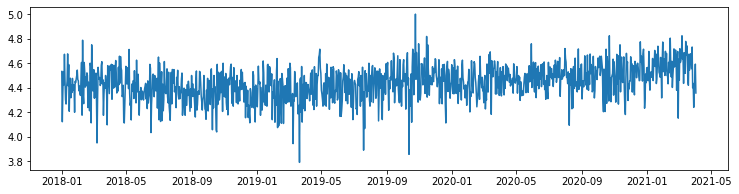

In [19]:
plt.figure(figsize=(12.5, 3))
plt.plot(day_average.index, day_average['Rating'])

### Average rating by week

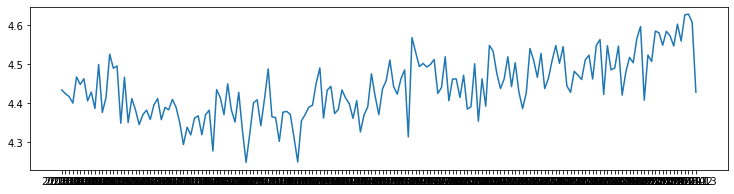

In [64]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_avg = data.groupby(['Week']).mean()

plt.figure(figsize=(12.5, 3))
plt.plot(week_avg.index, week_avg['Rating'])

### Average rating by month

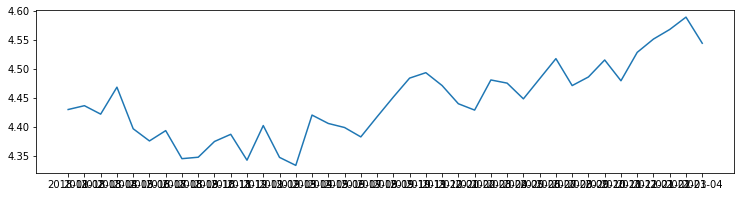

In [65]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_avg = data.groupby(['Month']).mean()

plt.figure(figsize=(12.5, 3))
plt.plot(month_avg.index, month_avg['Rating'])

### Average rating by month by course

In [80]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
# Unstack to create a pivot table with course name columns and Month rows
# No need to filter out the Rating column since it's the only numeric column that will produce mean values in the dataframe
month_avg_crs = data.groupby(['Month','Course Name']).mean().unstack()
month_avg_crs

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,4.353448,NaN,4.500000,4.285714,4.236842,4.355422,NaN,4.457368
2018-02,4.250000,NaN,4.205882,4.157895,4.437500,4.363095,NaN,4.481070
2018-03,4.500000,NaN,4.281250,4.266667,4.166667,4.357143,NaN,4.447037
2018-04,4.431034,NaN,4.468750,4.428571,4.250000,4.378947,NaN,4.507412
2018-05,4.358696,NaN,4.176471,4.107143,4.666667,4.362654,NaN,4.422085
2018-06,4.268293,NaN,4.631579,4.204545,4.333333,4.273876,NaN,4.421264
2018-07,4.589286,NaN,4.159091,4.065217,4.277778,4.330239,NaN,4.436156
2018-08,4.353659,NaN,4.411765,4.233333,4.100000,4.283388,NaN,4.376494
2018-09,4.238636,NaN,4.173913,4.500000,4.166667,4.247967,NaN,4.416413


In [78]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
# Unstack to create a pivot table with course name columns and Month rows
# Filter out the Rating column to ignore the count of other columns in the dataframe
month_avg_crs = data.groupby(['Month','Course Name'])['Rating'].count().unstack()
month_avg_crs

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,58.0,NaN,24.0,35.0,19.0,249.0,NaN,1079.0
2018-02,36.0,NaN,17.0,19.0,8.0,252.0,NaN,766.0
2018-03,46.0,NaN,16.0,15.0,6.0,273.0,NaN,793.0
2018-04,29.0,NaN,16.0,21.0,8.0,285.0,NaN,742.0
2018-05,46.0,NaN,17.0,28.0,6.0,324.0,NaN,892.0
2018-06,41.0,NaN,19.0,22.0,12.0,356.0,NaN,870.0
2018-07,28.0,NaN,22.0,23.0,9.0,377.0,NaN,744.0
2018-08,41.0,NaN,17.0,15.0,20.0,307.0,NaN,753.0
2018-09,44.0,NaN,23.0,17.0,15.0,369.0,NaN,658.0


<AxesSubplot:xlabel='Month'>

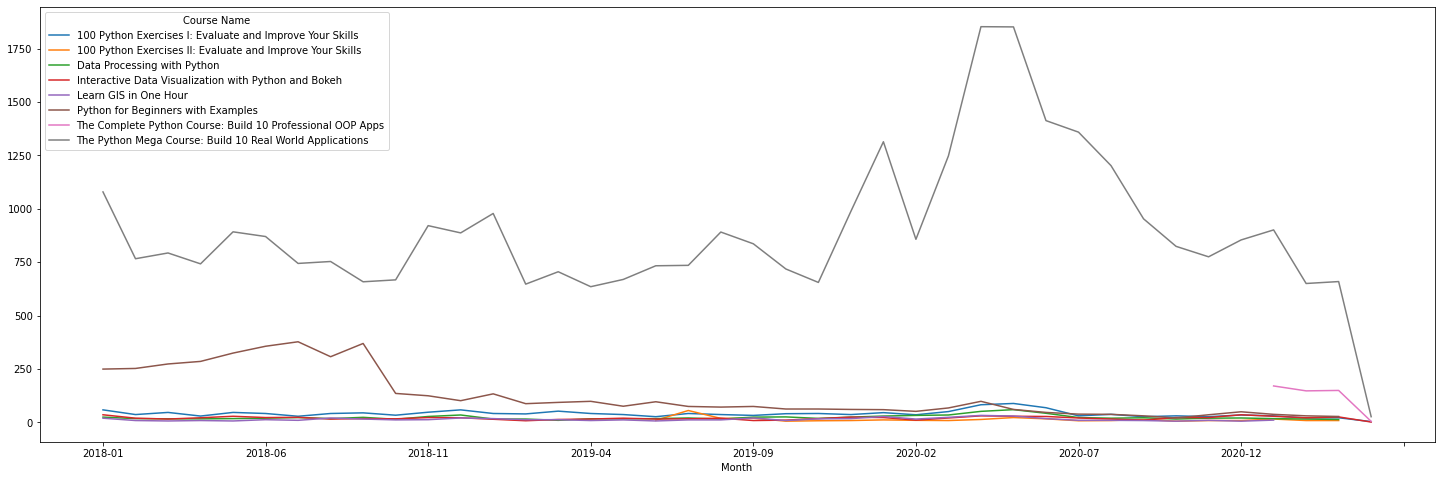

In [79]:
month_avg_crs.plot(figsize=(25, 8))

### 

### What day are people the happiest

In [113]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Day Number'] = data['Timestamp'].dt.strftime('%w')


weekday_average = data.groupby(['Weekday','Day Number']).mean()
weekday_average = weekday_average.sort_values('Day Number')
weekday_average

,,Rating
Weekday,Day Number,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


<AxesSubplot:xlabel='Weekday'>

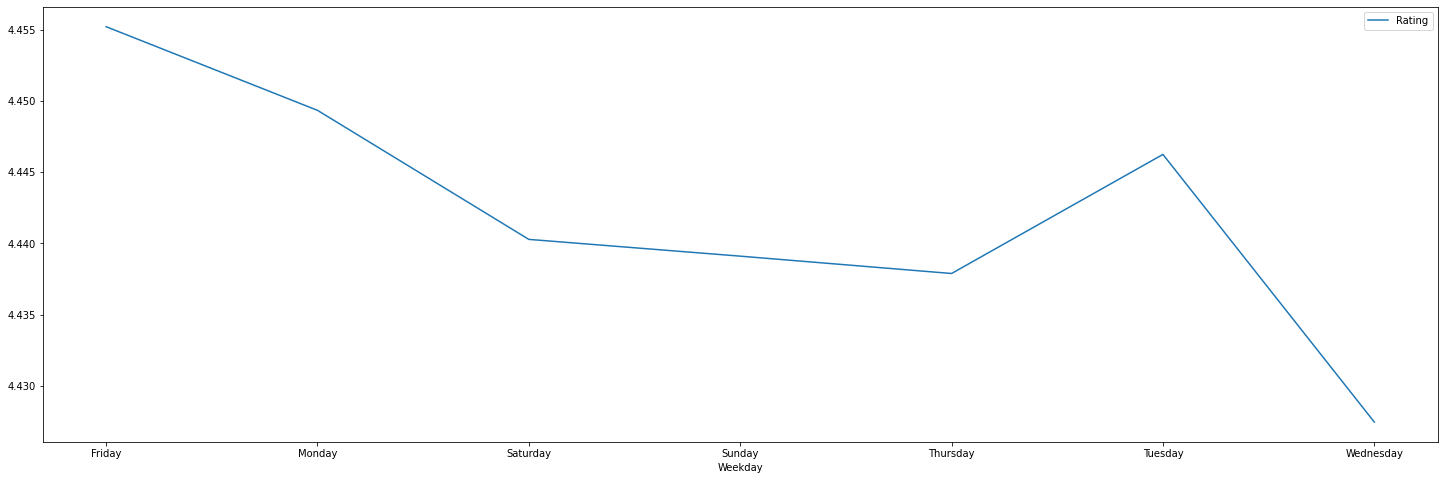

In [110]:
weekday_average.plot(figsize=(25, 8))

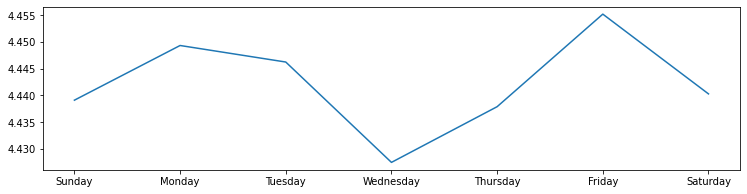

In [122]:
# get_level_values(0) to get the index column at position 0 of a muiti-index dataframe
plt.figure(figsize=(12.5, 3))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])